1. Consider a portfolio that has two assets. One is a coupon bond that has a face value of \\$10,000, a coupon rate of 5\%. The other is a fixed payment loan that pays out \\$1200 a year. Both assets have 10 years left to maturity. Using an interest rate of 6\%, calculate the total present value of this portfolio. You are required to use linear algebra to solve this problem. The specific requirements are:

* The cashflows of the two assets should be defined as two vectors

* Define a matrix called "cashflows" to include both vectors

* The discount factors for different years should also be included in a vector.

* In this process, you will need to compute the product of the cashflow matrix and the vector of discount factors. The output of the the product is a vector with two elements, each representing one asset. The final answer involves the sum of these two elements. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
i = .06

# arrays containing the discount factors
discount = np.array([1/(1+i)**(t+1) for t in range(10)])

cashflow1 = np.ones(10)*500
cashflow2 = np.ones(10)*1200
cashflows = np.array([cashflow1, cashflow2])

NPVs = cashflows @ discount

print(f'The NPV of the protfolio is ${NPVs.sum()+ 10000/((1+i)**10)}')

The NPV of the protfolio is $18096.095756556162


2. A 10-year coupon bond has a \\$1000 face value, and a yearly coupon rate of 5\%. In a graph, plot the relationship between purchasing prices and the implied yields to maturity. Let prices vary from \\$800 to \\$1100. 

step 1, solve for the yields for each price

step 2, plot

In [3]:
from scipy.optimize import newton

In [4]:
def get_PV(cf, i, n):
    stream = cf*np.ones(n)
    discounts = [1/(1+i)**(t+1) for t in np.arange(n) ]
    return stream@discounts

In [5]:
prices = np.linspace(800,1100,40)

In [6]:
n = 10
cf = 50

In [7]:
yields1 = np.zeros(len(prices))

In [8]:
for t in np.arange(len(yields1)):
    g = lambda i: get_PV(cf,i,n)+1000/(1+i)**n-prices[t] 
    yields1[t] = newton(g,0.1)

In [9]:
index = np.where(prices==1000)

Text(-30, 50, 'Purchase at par')

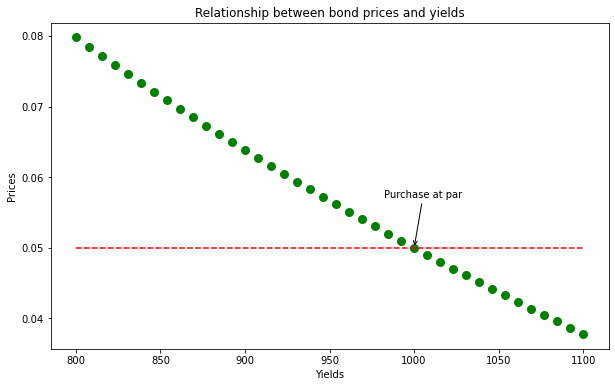

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(prices,yields1,color='g',linewidth=3)
ax.set_xlabel('Yields')
ax.set_ylabel('Prices')
ax.plot(prices,np.ones(len(prices))*yields1[index],color='r',linestyle='--')
ax.set_title('Relationship between bond prices and yields')
ax.annotate(
    "Purchase at par", xy=(prices[index], yields1[index]), xycoords="data",
    xytext=(-30, 50), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.0")
)